<div style="text-align: center; padding-right:80px;"><img src="https://hai-deep-learning.s3.eu-west-2.amazonaws.com/slim_demo_images/logo_big.png" style="height:100px"></div>
<span style="text-align: center;"> 

# SLIM&trade; Technology and Sagemaker Integrated Service

<br>
</span>


## High Performance Real-time Inference


Real-time inference is a critical component for many robotics, IoT, and AI applications. At Headlight AI we have integrated our novel SLIM&trade; technology with Amazon's AWS Sagemaker framework, providing a fully managed environment that allows users to integrate SLIM&trade; into their machine learning pipelines, deploy SLIM&trade; at scale and operate SLIM&trade; in a distributed fashion at real time with just a few clicks! 

We believe this empowers our users to exploit SLIM&trade; in real time applications, e.g. anomaly detection.

The following demo supports 2 frames per second inference, where HAI's SLIM model is capable of performing multi-object classification in real-time. 

HAI's SLIM models are available on [AWS Marketplace](http://52.18.57.183:8888/notebooks/HAI-SLIM_Video_DEMO_Sagemaker.ipynb)


### TOC:
* [1. Sagemaker Environment Setup](#first-section)
* [2. Real-time Inference on Videos](#second-section)
* [3. Real-time Classification using SLIM Models in Sagemaker](#third-section)
* [4. Visualisation in HAI's Time Series Dashboard](#fourth-section)
* [5. Support](#fifth-section)

## 1. Sagemaker Environment Setup 

The following imports the necessary libs and creates a managed Amazon SageMaker session as well as an IAM role with the necessary permissions.

To subscribe to an inference endpoint click `Continue to Subscribe` on our [product page](https://aws.amazon.com/marketplace/pp/prodview-pi5pcy2nh5cly?qid=1584017542738&sr=0-1&ref_=srh_res_product_title)

In [2]:
import boto3
from sagemaker import get_execution_role
import json

# Obtain runtime config
sm_client = boto3.client(service_name='sagemaker')
runtime_sm_client = boto3.client(service_name='sagemaker-runtime')

# Set up pointer to the inference endpoint with HAI SLIM deployed models
endpoint_name = 'DEMO-Endpoint-2020'

account_id = boto3.client('sts').get_caller_identity()['Account']
region = boto3.Session().region_name

bucket = 'sagemaker-{}-{}'.format(region, account_id)
prefix = 'demo-multimodel-endpoint'

# Set access role to Sagemaker environment to be set by the user
role = get_execution_role()

Couldn't call 'get_role' to get Role ARN from role name mj89 to get Role path.


ValueError: The current AWS identity is not a role: arn:aws:iam::182588083674:user/mj89, therefore it cannot be used as a SageMaker execution role

## 2. Real-time Inference on Videos

HAI-SLIM container image is trained on Imagenet dataset and is integrated within the AWS Sagemaker service, and can be deployed on as many endpoints that are needed for real-time inference.

### Sample user video: Dog in the Room! 

For this demo you need to download the augmented video and images from HAI's public S3 bucket where `vids`, `imgs` and `responses` folders contain sample videos, images and server responses, respectively: 
`s3://slim-sagemaker-anomaly-detection/` 


After downloading them into a local directory you can stream the data to the endpoint with HAI's SLIM deployed models and receive predictions.   

In [9]:
import os
from IPython.display import Video

# User local directory
LOCAL_DIR = ''

os.chdir(LOCAL_DIR)

Video("./vids/dog_vid.mp4", embed=True, width=600, height=500)


## 3. Real-time Classification using SLIM Models in Sagemaker 

This demo supports 2 frames per second inference, and HAI's SLIM model is capable of performing multi-object classification in real-time.

The following invokes the endpoint machine and HAI's SLIM classification inference pipeline on the provided video. 

In [13]:
%%time

import glob, os
import time
from datetime import timedelta

# User local directory
LOCAL_DIR = ''
HAI_SLIM_Model = 'hai-slim-model.tar.gz'

os.chdir(LOCAL_DIR)

for file in sorted(glob.glob(os.path.join("./imgs/","*.png"))):
    with open(file, 'rb') as f:
         payload = f.read()

    start = time.time()
    response = runtime_sm_client.invoke_endpoint(
        EndpointName=endpoint_name,
        ContentType='application/x-image',
        TargetModel= HAI_SLIM_Model       
        Body=payload)
    
    end = time.time()
    f = file
    t = "%.2f" % (end - start)
    print(file)
    print(t)
    print(*json.loads(response['Body'].read()), sep = '\n')
    

0001.png
0.93
probability=0.810416, class=n02085620 chihuahua
probability=0.115109, class=n03933933 else
probability=0.031697, class=n02788148 else
probability=0.028558, class=n02108915 french bulldog
probability=0.014220, class=n04366367 else
0002.png
0.39
probability=0.688531, class=n02085620 chihuahua
probability=0.128506, class=n03933933 else
probability=0.123347, class=n02788148 else
probability=0.049438, class=n02108915 french bulldog
probability=0.010178, class=n04366367 else
0003.png
0.30
probability=0.467277, class=n02085620 chihuahua
probability=0.281751, class=n03933933 else
probability=0.205585, class=n02788148 else
probability=0.038486, class=n02108915 french bulldog
probability=0.006901, class=n04366367 else
0004.png
0.30
probability=0.610537, class=n02085620 chihuahua
probability=0.131230, class=n02108915 french bulldog
probability=0.125976, class=n02788148 else
probability=0.124312, class=n03933933 else
probability=0.007945, class=n04366367 else
0005.png
0.30
probabilit

0035.png
0.30
probability=0.783871, class=n02085620 chihuahua
probability=0.141221, class=n02108915 french bulldog
probability=0.062298, class=n02788148 else
probability=0.008950, class=n03933933 else
probability=0.003659, class=n04366367 else
0036.png
0.39
probability=0.790284, class=n02085620 chihuahua
probability=0.109750, class=n02108915 french bulldog
probability=0.045286, class=n02788148 else
probability=0.044525, class=n03933933 else
probability=0.010154, class=n04366367 else
0037.png
0.29
probability=0.827223, class=n02085620 chihuahua
probability=0.112757, class=n02108915 french bulldog
probability=0.052194, class=n02788148 else
probability=0.003962, class=n04366367 else
probability=0.003866, class=n03933933 else
0038.png
0.29
probability=0.723285, class=n02085620 chihuahua
probability=0.210530, class=n02108915 french bulldog
probability=0.034065, class=n03933933 else
probability=0.029362, class=n02788148 else
probability=0.002757, class=n04366367 else
0039.png
0.30
probabilit

0073.png
0.29
probability=0.739109, class=n02085620 chihuahua
probability=0.129979, class=n02108915 french bulldog
probability=0.062981, class=n03933933 else
probability=0.060768, class=n02788148 else
probability=0.007162, class=n04366367 else
0074.png
0.29
probability=0.662931, class=n02085620 chihuahua
probability=0.168072, class=n03933933 else
probability=0.100747, class=n02108915 french bulldog
probability=0.047164, class=n02788148 else
probability=0.021085, class=n04366367 else
0075.png
0.29
probability=0.819569, class=n02085620 chihuahua
probability=0.072553, class=n02108915 french bulldog
probability=0.046369, class=n03933933 else
probability=0.032070, class=n02788148 else
probability=0.029439, class=n04366367 else
0077.png
0.31
probability=0.451276, class=n02085620 chihuahua
probability=0.218221, class=n02108915 french bulldog
probability=0.148283, class=n03933933 else
probability=0.139927, class=n02788148 else
probability=0.042294, class=n04366367 else
0078.png
0.29
probabilit

0108.png
0.29
probability=0.473628, class=n02085620 chihuahua
probability=0.319867, class=n02108915 french bulldog
probability=0.147509, class=n03933933 else
probability=0.053134, class=n02788148 else
probability=0.005862, class=n04366367 else
0109.png
0.30
probability=0.777928, class=n02085620 chihuahua
probability=0.078151, class=n02108915 french bulldog
probability=0.068879, class=n03933933 else
probability=0.067448, class=n02788148 else
probability=0.007594, class=n04366367 else
0110.png
0.29
probability=0.894442, class=n02085620 chihuahua
probability=0.051251, class=n02108915 french bulldog
probability=0.035440, class=n03933933 else
probability=0.014633, class=n02788148 else
probability=0.004235, class=n04366367 else
0111.png
0.29
probability=0.772228, class=n02085620 chihuahua
probability=0.131626, class=n02108915 french bulldog
probability=0.065892, class=n03933933 else
probability=0.023641, class=n02788148 else
probability=0.006612, class=n04366367 else
0112.png
0.30
probabilit

0143.png
0.30
probability=0.325957, class=n03933933 else
probability=0.300408, class=n02108915 french bulldog
probability=0.206719, class=n02085620 chihuahua
probability=0.131541, class=n02788148 else
probability=0.035376, class=n04366367 else
0144.png
0.31
probability=0.408434, class=n03933933 else
probability=0.217533, class=n02108915 french bulldog
probability=0.148547, class=n02788148 else
probability=0.128916, class=n02085620 chihuahua
probability=0.096570, class=n04366367 else
0145.png
0.30
probability=0.306673, class=n02108915 french bulldog
probability=0.296503, class=n02085620 chihuahua
probability=0.249782, class=n03933933 else
probability=0.126293, class=n02788148 else
probability=0.020748, class=n04366367 else
0147.png
0.30
probability=0.434256, class=n03933933 else
probability=0.277528, class=n02788148 else
probability=0.156336, class=n02108915 french bulldog
probability=0.085503, class=n02085620 chihuahua
probability=0.046377, class=n04366367 else
0148.png
0.30
probabilit

Save the endpoint response into a `.txt` file and move to the next step.

## 4. Anomaly Visualisation using HAI's Time Series Library

In this section the video classification responses received from the endpoint are visualised in an embedded dashboard.

Using hai_dashboard's library you can visualise the real-time responses to see a) processing time per frame and b) for how long a particular object existed in the target scene.

The following github repository contains the utility files for visualisation: [repo](https://github.com/headlightai/slim-ml-suite)

### Rain/fog augmented Videos (SLIM vs. Mxnet Model Zoo)

Using HAI's augmenter we have simulated fog/rain in the demo video above and tested SLIM vs. Model Zoo models available [here](https://gluon-cv.mxnet.io/model_zoo/index.html)

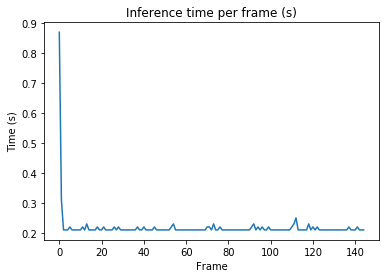

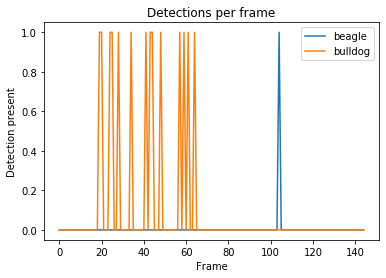

In [6]:
## Real-time inference using Model Zoo Resnet-18 model on 'rainy' videos
import hai_dashboard as hd

with open('response-resnet18.txt', 'r') as fp:
    data = fp.read().split('\n')
    list_of_json = hd.per_frame_analysis(data, 0.5)
    data = hd.visualise(list_of_json)

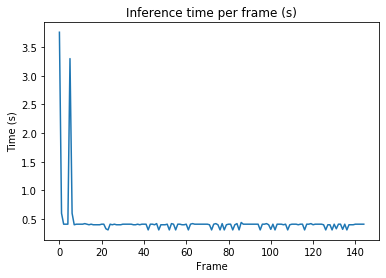

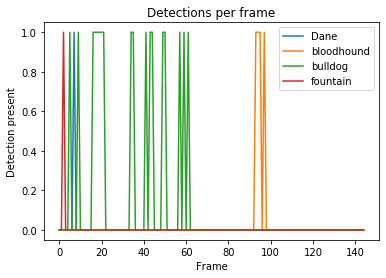

In [7]:
## Real-time inference using Model Zoo Resnet-50 model on 'rainy' videos
import hai_dashboard as hd

with open('response-resnet50.txt', 'r') as fp:
    data = fp.read().split('\n')
    list_of_json = hd.per_frame_analysis(data, 0.6)
    data = hd.visualise(list_of_json)

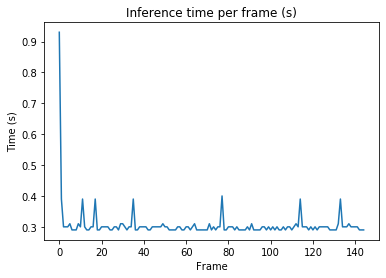

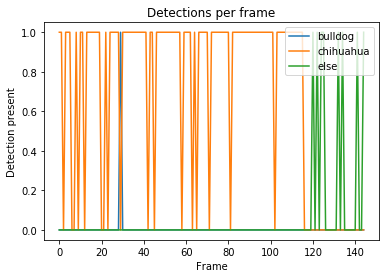

In [14]:
## Real-time inference using SLIM Resnet-50 Model on 'rainy' videos
import hai_dashboard as hd

with open('response-hai-slim.txt', 'r') as fp:
    data = fp.read().split('\n')
    list_of_json = hd.per_frame_analysis(data, 0.5)
    data = hd.visualise(list_of_json)

## 5. Support

For any questions regarding model deployment or usage instructions please get in touch:
support@headlight.ai